In [21]:
# # @title Default title text
#  Name - Sahil Kewat
#  Email-Id - sunny2018kewat@gmail.com
#  Task - Mall Customers Segmentation analysis using Python
#  Internship - Data Science Internship -- Seven7code Technologies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
X = df.iloc[:,[3,4]].values

In [ ]:
X

In [10]:
from sklearn.cluster import KMeans
wcss = [] # Within Cluster Sum of Square

In [11]:
for i in range(1,11):
  kmeans = KMeans(n_clusters=i ,init = 'k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

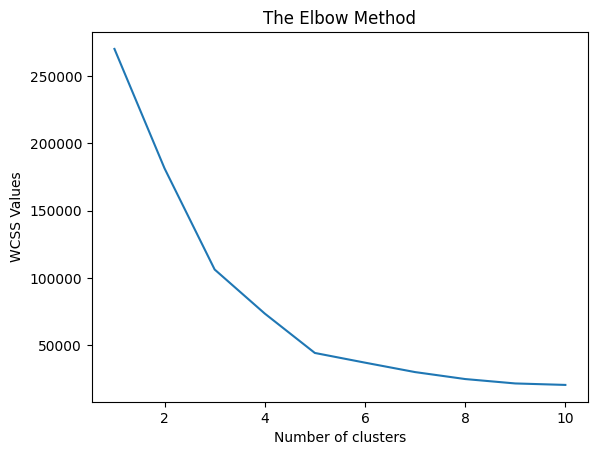

In [13]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Values')
plt.show()

In [14]:
kmeansmodel = KMeans(n_clusters = 5,init = 'k-means++',random_state = 0)

In [15]:
y_kmeans = kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


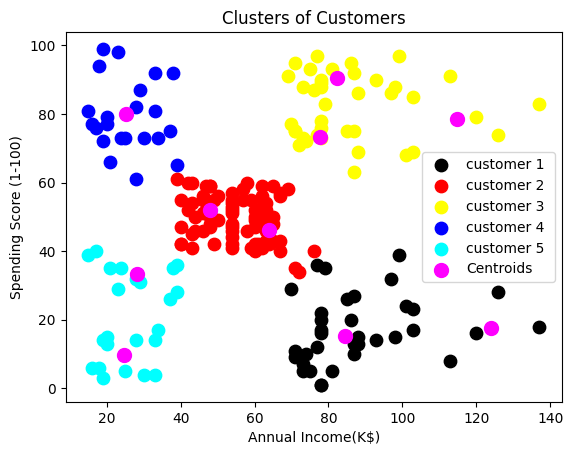

In [18]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans ==0,1],s=80,c='black',label='customer 1 ')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans ==1,1],s=80,c='red',label='customer 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans ==2,1],s=80,c='yellow',label='customer 3 ')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans ==3,1],s=80,c='blue',label='customer 4 ')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans ==4,1],s=80,c='cyan',label='customer 5 ')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='Magenta',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()